### Regression case study EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../data/Train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

#### Want to see all the columns

In [4]:
print "Default columns to display: ", pd.options.display.max_columns
print "Columns in data: ", len(df_train.columns.tolist())

Default columns to display:  20
Columns in data:  53


In [5]:
pd.options.display.max_columns = 53
pd.options.display.max_rows = 100

In [6]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


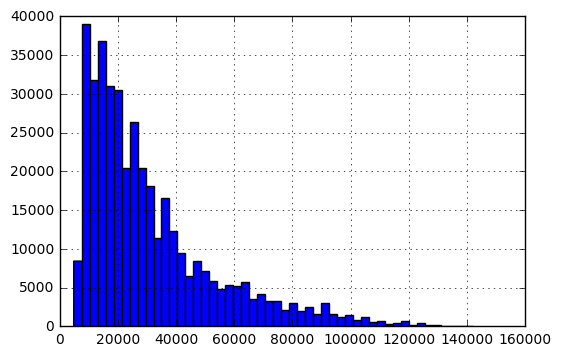

In [7]:
df_train['SalePrice'].hist(bins=50);

#### Really right skewed.  Could be a challenge to predict the larger sales prices, and it looks like there will be fewer training examples for them.  

Will start with picking a subset of the columns that have data that I think make sense and make an initial model.  Being ruthless here.

In [8]:
df_train_nonan = df_train.dropna(axis = 'columns', how = 'any')

In [9]:
df_train_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 13 columns):
SalesID               401125 non-null int64
SalePrice             401125 non-null int64
MachineID             401125 non-null int64
ModelID               401125 non-null int64
datasource            401125 non-null int64
YearMade              401125 non-null int64
saledate              401125 non-null object
fiModelDesc           401125 non-null object
fiBaseModel           401125 non-null object
fiProductClassDesc    401125 non-null object
state                 401125 non-null object
ProductGroup          401125 non-null object
ProductGroupDesc      401125 non-null object
dtypes: int64(6), object(7)
memory usage: 39.8+ MB


#### Investigate remaining columns

In [10]:
### unique values in each columns
print "Unique values"
cols = df_train_nonan.columns.tolist()
for col in cols:
    print "{0:<20s} {1}".format(col, len(df_train_nonan[col].unique()))

Unique values
SalesID              401125
SalePrice            899
MachineID            341027
ModelID              5218
datasource           5
YearMade             72
saledate             3919
fiModelDesc          4999
fiBaseModel          1950
fiProductClassDesc   74
state                53
ProductGroup         6
ProductGroupDesc     6


#### I don't think SalesID or MachineID will have much discriminatory power

In [11]:
cols.remove('SalesID')
cols.remove('MachineID')

In [12]:
for col in cols:
    print "\n" + col
    print df_train_nonan[col].value_counts()  


SalePrice
25000     7689
20000     7504
15000     7336
26000     6988
14000     6935
16000     6934
17000     6790
10000     6700
11000     6683
13000     6675
18000     6622
19000     6611
9000      6474
24000     6460
30000     6212
21000     6197
22000     6137
12000     6058
23000     5939
27000     5694
8500      5667
12500     5429
9500      5409
35000     5399
10500     5329
29000     5265
13500     5128
28000     4990
11500     4986
17500     4982
8000      4780
31000     4637
32000     4415
40000     4398
14500     4390
15500     4221
36000     4219
16500     4150
18500     3896
34000     3859
33000     3764
45000     3717
37000     3548
39000     3518
22500     3371
19500     3291
50000     3267
38000     3125
27500     2921
55000     2903
          ... 
32075        1
22350        1
4935         1
60250        1
101750       1
5460         1
24525        1
24300        1
24700        1
10350        1
39800        1
12650        1
16350        1
48250        1
89025        1

#### A lot of these are categorical and there are too many categories for now.  Will focus on the following columns:  datasource, YearMade, saledate, and ProductGroup

In [13]:
cols2 = ['datasource', 'YearMade', 'saledate', 'ProductGroup']

In [14]:
df_X = df_train_nonan[cols2]
df_y = df_train_nonan['SalePrice'].astype(float)
df_X.head()

,datasource,YearMade,saledate,ProductGroup
0,121,2004,11/16/2006 0:00,WL
1,121,1996,3/26/2004 0:00,WL
2,121,2001,2/26/2004 0:00,SSL
3,121,2001,5/19/2011 0:00,TEX
4,121,2007,7/23/2009 0:00,SSL


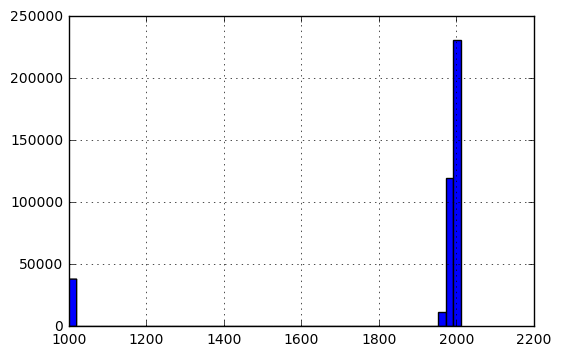

In [15]:
df_X['YearMade'].hist(bins = 50);

#### Well that's an obvious issue.  For those that were made in 1000 will fill with the median value, and make a categorical column indicating if it was 1000 or not.

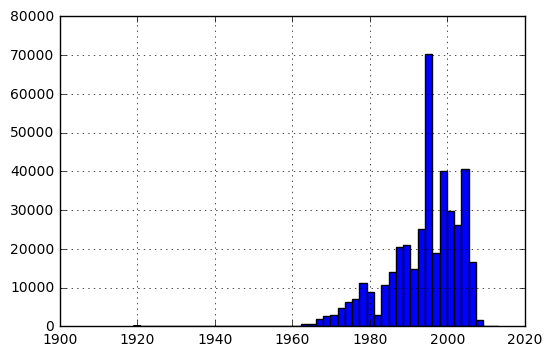

In [16]:
made_in_1000 = df_X['YearMade'] == 1000
year_median = df_X['YearMade'].median()
df_X['y1000'] = made_in_1000.astype(float)
df_X.loc[made_in_1000,'YearMade'] = year_median
df_X['YearMade'].hist(bins = 50);

In [17]:
df_X.head()

,datasource,YearMade,saledate,ProductGroup,y1000
0,121,2004.0,11/16/2006 0:00,WL,0.0
1,121,1996.0,3/26/2004 0:00,WL,0.0
2,121,2001.0,2/26/2004 0:00,SSL,0.0
3,121,2001.0,5/19/2011 0:00,TEX,0.0
4,121,2007.0,7/23/2009 0:00,SSL,0.0


In [18]:
## convert saledate to a datetime and compute age at time of sale
df_X['sale_year'] = pd.to_datetime(df_X['saledate']).apply(lambda x: x.year)
df_X['age_at_sale'] = df_X['sale_year'] - df_X['YearMade']
df_X.head()

,datasource,YearMade,saledate,ProductGroup,y1000,sale_year,age_at_sale
0,121,2004.0,11/16/2006 0:00,WL,0.0,2006,2.0
1,121,1996.0,3/26/2004 0:00,WL,0.0,2004,8.0
2,121,2001.0,2/26/2004 0:00,SSL,0.0,2004,3.0
3,121,2001.0,5/19/2011 0:00,TEX,0.0,2011,10.0
4,121,2007.0,7/23/2009 0:00,SSL,0.0,2009,2.0


In [19]:
del df_X['saledate']
del df_X['sale_year']

In [20]:
df_X.head()

,datasource,YearMade,ProductGroup,y1000,age_at_sale
0,121,2004.0,WL,0.0,2.0
1,121,1996.0,WL,0.0,8.0
2,121,2001.0,SSL,0.0,3.0
3,121,2001.0,TEX,0.0,10.0
4,121,2007.0,SSL,0.0,2.0


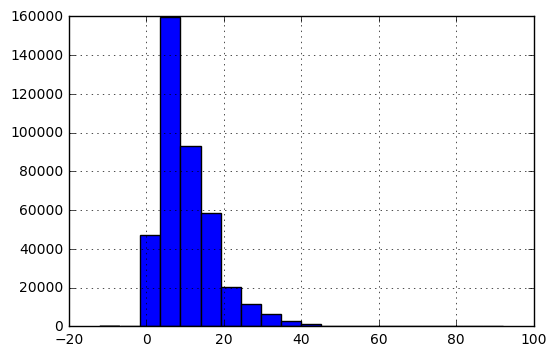

In [21]:
df_X['age_at_sale'].hist(bins = 20);

In [22]:
df_X.to_csv('temp.csv')  #save this just in case

In [23]:
df_X.head()

,datasource,YearMade,ProductGroup,y1000,age_at_sale
0,121,2004.0,WL,0.0,2.0
1,121,1996.0,WL,0.0,8.0
2,121,2001.0,SSL,0.0,3.0
3,121,2001.0,TEX,0.0,10.0
4,121,2007.0,SSL,0.0,2.0


In [24]:
df_X['datasource'].value_counts()

132    260752
136     75491
149     26304
121     23979
172     14599
Name: datasource, dtype: int64

In [25]:
df_X['ProductGroup'].value_counts()

TEX    101167
TTT     80520
BL      79415
WL      71046
SSL     43488
MG      25489
Name: ProductGroup, dtype: int64

In [26]:
df_X = pd.get_dummies(df_X, columns = ['datasource','ProductGroup'], drop_first = False)
df_X.head()

,YearMade,y1000,age_at_sale,datasource_121,datasource_132,datasource_136,datasource_149,datasource_172,ProductGroup_BL,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL
0,2004.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1996.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2001.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2007.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
### pick one of datasource and ProductGroup to drop
del df_X['datasource_132']
del df_X['ProductGroup_TEX']

In [28]:
df_X.head()

,YearMade,y1000,age_at_sale,datasource_121,datasource_136,datasource_149,datasource_172,ProductGroup_BL,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TTT,ProductGroup_WL
0,2004.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1996.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2001.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
print "X has {0} columns.".format(len(df_X.columns.tolist()))

X has 12 columns.


### Train a simple model - Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
### will train on all data for now - no tuning
X_train, y_train = df_X, df_y

In [32]:
model = RandomForestRegressor(50, n_jobs=-1, oob_score = True)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

### Find feature importances

In [33]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
X_cols = X_train.columns.tolist()    

for g in range(X_train.shape[1]):
    print "{0:2d} {1:<20s} {2:0.2f}".format(g + 1, X_cols[indices[g]], importances[indices[g]])

Feature ranking:
 1 age_at_sale          0.25
 2 ProductGroup_SSL     0.19
 3 ProductGroup_BL      0.18
 4 YearMade             0.15
 5 ProductGroup_MG      0.10
 6 y1000                0.08
 7 ProductGroup_WL      0.02
 8 ProductGroup_TTT     0.01
 9 datasource_136       0.01
10 datasource_121       0.01
11 datasource_172       0.00
12 datasource_149       0.00


In [34]:
y_pred_train = model.predict(X_train)

In [35]:
### error functions
import numpy as np
def root_mean_sq_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def root_mean_sq_log_error(y_true, y_pred):
    return np.sqrt(np.mean((np.log(y_true + 1) - np.log(y_pred+1))**2))

In [36]:
rmse_train = root_mean_sq_error(y_train, y_pred_train)
rmsle_train = root_mean_sq_log_error(y_train, y_pred_train)
print "The train rmse was {0:0.3f}.".format(rmse_train)
print "The train rmsle was {0:0.3f}.".format(rmsle_train)

The train rmse was 16340.238.
The train rmsle was 0.475.


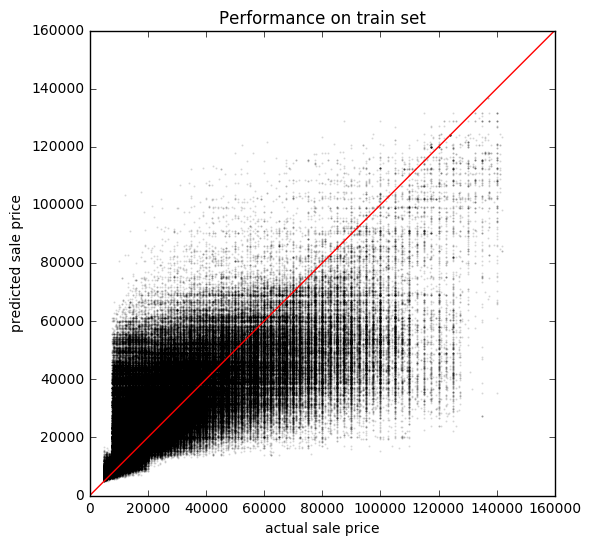

In [37]:
line_x, line_y = [0,160000], [0, 160000]

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.plot(y_train, y_pred_train, 'ko', markersize = 1, alpha = 0.1)
ax.plot(line_x, line_y, 'r-')
ax.set_aspect('equal')
ax.set_xlabel('actual sale price')
ax.set_ylabel('predicted sale price')
ax.set_title('Performance on train set');

### Now predict on the test set

In [38]:
df_test = pd.read_csv('../data/test.csv')
cols = ['datasource', 'YearMade', 'saledate', 'ProductGroup']
df_X_test = df_test[cols]

In [39]:
df_X_test.head()

,datasource,YearMade,saledate,ProductGroup
0,121,1000,1/5/2012 0:00,TEX
1,121,2006,1/5/2012 0:00,TEX
2,121,2000,1/5/2012 0:00,TEX
3,121,1000,1/5/2012 0:00,TEX
4,121,2002,1/4/2012 0:00,WL


In [40]:
made_in_1000 = df_X_test['YearMade'] == 1000
# do not recalculate median
df_X_test['y1000'] = made_in_1000.astype(float)
df_X_test.loc[made_in_1000,'YearMade'] = year_median
df_X_test.head()

,datasource,YearMade,saledate,ProductGroup,y1000
0,121,1995.0,1/5/2012 0:00,TEX,1.0
1,121,2006.0,1/5/2012 0:00,TEX,0.0
2,121,2000.0,1/5/2012 0:00,TEX,0.0
3,121,1995.0,1/5/2012 0:00,TEX,1.0
4,121,2002.0,1/4/2012 0:00,WL,0.0


In [41]:
## convert saledate to a datetime and compute age at time of sale
df_X_test['sale_year'] = pd.to_datetime(df_X_test['saledate']).apply(lambda x: x.year)
df_X_test['age_at_sale'] = df_X_test['sale_year'] - df_X_test['YearMade']
df_X_test.head()

,datasource,YearMade,saledate,ProductGroup,y1000,sale_year,age_at_sale
0,121,1995.0,1/5/2012 0:00,TEX,1.0,2012,17.0
1,121,2006.0,1/5/2012 0:00,TEX,0.0,2012,6.0
2,121,2000.0,1/5/2012 0:00,TEX,0.0,2012,12.0
3,121,1995.0,1/5/2012 0:00,TEX,1.0,2012,17.0
4,121,2002.0,1/4/2012 0:00,WL,0.0,2012,10.0


In [42]:
del df_X_test['saledate']
del df_X_test['sale_year']

In [43]:
df_X_test.head()

,datasource,YearMade,ProductGroup,y1000,age_at_sale
0,121,1995.0,TEX,1.0,17.0
1,121,2006.0,TEX,0.0,6.0
2,121,2000.0,TEX,0.0,12.0
3,121,1995.0,TEX,1.0,17.0
4,121,2002.0,WL,0.0,10.0


In [44]:
df_X_test = pd.get_dummies(df_X_test, columns = ['datasource','ProductGroup'], drop_first = False)
del df_X_test['datasource_132']
del df_X_test['ProductGroup_TEX']

In [45]:
print "X_test has {0} columns".format(len(df_X_test.columns.tolist()))

X_test has 12 columns


In [46]:
X_test = df_X_test

In [47]:
y_pred_test = model.predict(X_test).round(2)

### Output answers for Performotron

In [48]:
df_output = pd.DataFrame({'SalePrice': y_pred_test}, index=df_test['SalesID'])
df_output.to_csv('../data/test_predictions.csv')